# Ford GoBike 2008 Investigation

In [29]:
# import packages
import pandas as pd 
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [3]:
folder = r'data/'
files = glob.glob(folder + '*-fordgobike-tripdata.csv')

dfs = (pd.read_csv(file) for file in files)
df = pd.concat(dfs, ignore_index=True)

In [4]:
df.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,76491,2018-09-30 18:37:01.7710,2018-10-01 15:51:53.5530,120.0,Mission Dolores Park,37.761420,-122.426435,26.0,1st St at Folsom St,37.787290,-122.394380,903,Customer,1998.0,Female,No
1,50832,2018-09-30 19:49:31.9530,2018-10-01 09:56:44.7320,NaN,NaN,37.410000,-121.940000,NaN,NaN,37.410000,-121.940000,4154,Customer,1992.0,Male,No
2,74498,2018-09-30 11:34:44.7970,2018-10-01 08:16:23.3570,55.0,Webster St at Grove St,37.777053,-122.429558,55.0,Webster St at Grove St,37.777053,-122.429558,2696,Customer,NaN,NaN,No
3,79396,2018-09-30 10:12:49.9400,2018-10-01 08:16:06.0440,11.0,Davis St at Jackson St,37.797280,-122.398436,55.0,Webster St at Grove St,37.777053,-122.429558,2458,Customer,1990.0,Male,No
4,60287,2018-09-30 15:28:03.5560,2018-10-01 08:12:50.7870,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2497,Customer,NaN,NaN,No
5,70755,2018-09-30 12:26:06.6710,2018-10-01 08:05:22.5950,188.0,Dover St at 57th St,37.842630,-122.267738,190.0,West St at 40th St,37.830223,-122.270950,1483,Customer,1985.0,Male,No
6,57147,2018-09-30 15:06:12.7180,2018-10-01 06:58:40.4270,50.0,2nd St at Townsend St,37.780526,-122.390288,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,2706,Customer,1996.0,Male,No
7,20180,2018-09-30 20:13:33.6250,2018-10-01 01:49:53.6560,73.0,Pierce St at Haight St,37.771793,-122.433708,97.0,14th St at Mission St,37.768265,-122.420110,3979,Subscriber,1983.0,Female,No
8,3333,2018-09-30 23:39:58.2460,2018-10-01 00:35:31.7470,327.0,5th St at San Salvador St,37.332039,-121.881766,327.0,5th St at San Salvador St,37.332039,-121.881766,1597,Customer,2000.0,Male,No
9,8684,2018-09-30 21:46:43.4270,2018-10-01 00:11:28.0150,307.0,SAP Center,37.332692,-121.900084,341.0,Fountain Alley at S 2nd St,37.336188,-121.889277,1076,Customer,NaN,NaN,No


In [5]:
df.shape

(1863721, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [8]:
df.start_time = pd.to_datetime(df.start_time)

In [42]:
df.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

## When are most trips taken in terms of time of day, day of the week, or month of the year?

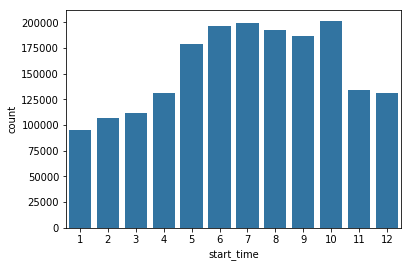

In [9]:
base_color = sns.color_palette()[0]
sns.countplot(df.start_time.dt.month, color=base_color)

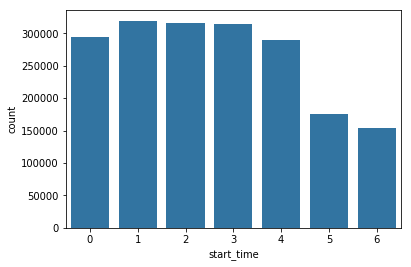

In [10]:
sns.countplot(df.start_time.dt.dayofweek, color=base_color);

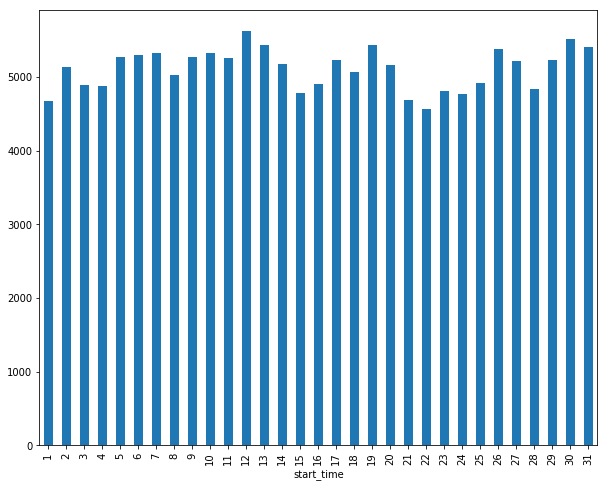

In [11]:
plt.figure(figsize=(10,8))
index = pd.DatetimeIndex(df.start_time)
df1 = df.reindex(index=index)
df1 = df1.resample('D').size()
df1.groupby(df1.index.day).mean().plot('bar') 

## How long does the average trip take?

In [12]:
df.duration_sec.mean()

857.3025710393348

## Does the above depend on if a user is a subscriber or customer?

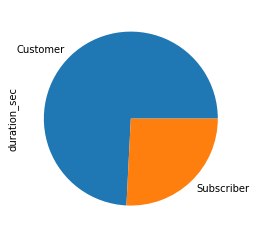

In [43]:
df.groupby('user_type').duration_sec.mean().plot('pie')

## what is the 10 top station that trips start from ?

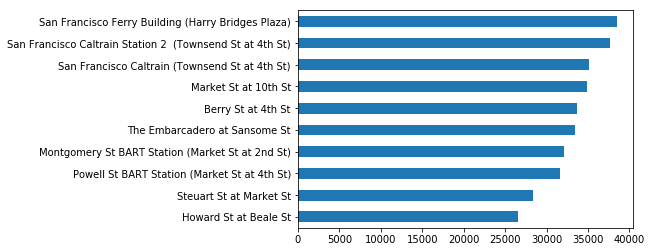

In [14]:
df.start_station_name.value_counts()[:10].sort_values().plot('barh');

## What is the top 10 stations that trips start from ?

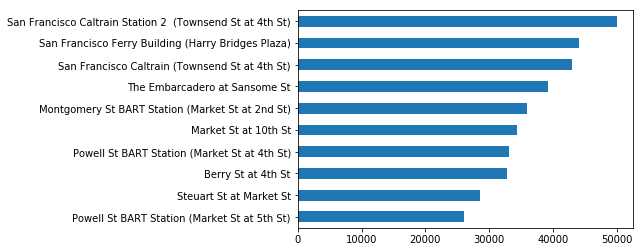

In [15]:
df.end_station_name.value_counts()[:10].sort_values().plot('barh');

## Gender distripution ?

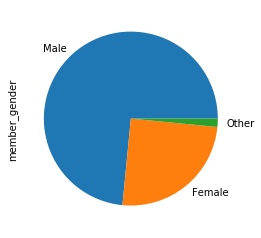

In [47]:
df.member_gender.value_counts().plot('pie');

## Time usage by gender

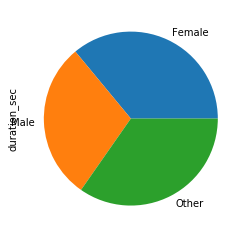

In [49]:
df.groupby('member_gender').duration_sec.mean().plot('pie')

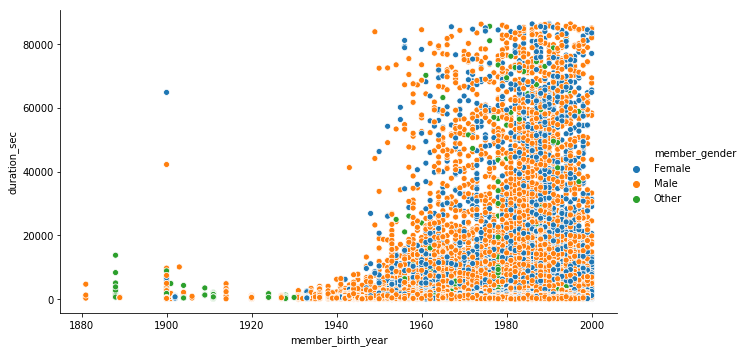

In [50]:
bins = np.arange(1900,2010,10)
sns.relplot('member_birth_year', 'duration_sec',hue='member_gender', data=df,aspect=16/9)

## most used bike?

In [26]:
df.groupby('bike_id').duration_sec.sum().sort_values(ascending=False)[:10] //3600

bike_id
3961    330
3235    324
4452    294
1181    291
2970    288
2237    285
3570    283
3614    278
1298    273
2375    271
Name: duration_sec, dtype: int64

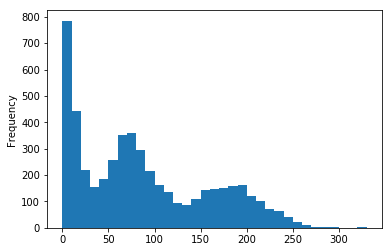

In [30]:
bins = np.arange(0, 330+10, 10)
(df.groupby('bike_id').duration_sec.sum() //3600).plot('hist', bins=bins)